# Исследование развлекательного приложения Procrastinate Pro+

# Описание проекта

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.

Предстоит изучить:

    откуда приходят пользователи и какими устройствами они пользуются,
    сколько стоит привлечение пользователей из различных рекламных каналов;
    сколько денег приносит каждый клиент,
    когда расходы на привлечение клиента окупаются,
    какие факторы мешают привлечению клиентов.

# Описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.
    
Структура orders_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.
    
Структура costs_info_short.csv:

    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.

# Шаг 1. Загрузите данные и подготовьте их к анализу

## Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
Пути к файлам

    /datasets/visits_info_short.csv.
    /datasets/orders_info_short.csv.
    /datasets/costs_info_short.csv.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy import stats as st

# Загрузка данных из CSV-файлов
visits_info = pd.read_csv('/datasets/visits_info_short.csv')
orders_info = pd.read_csv('/datasets/orders_info_short.csv')
costs_info = pd.read_csv('/datasets/costs_info_short.csv')

In [2]:
# Изучение загруженных данных

print("Данные о визитах:")
print(visits_info.info())
print(visits_info.head())

print("\nДанные о заказах:")
print(orders_info.info())
print(orders_info.head())

print("\nДанные о расходах:")
print(costs_info.info())
print(costs_info.head())

Данные о визитах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  


**Вывод:** По визитам: в наборе данных содержится 309901 запись. Отсутствие пропусков: Все столбцы содержат полные данные (non-null count равен количеству записей), что упрощает анализ и исключает необходимость в предварительной обработке данных для заполнения пропусков. Session реобразовать в формат datetime

По заказам: В DataFrame содержится 40212 записей. Пропуски отсутствуют. Поскольку столбец Event Dt имеет тип object, его следует преобразовать в формат datetime. Это позволит более эффективно анализировать данные по времени (например, группировать по месяцам, неделям или дням).

По расходам: В DataFrame содержится 1800 записей. Этот столбец имеет 1800 непустых значений, но его тип данных определяется как object. Это указывает на то, что данные могут быть представлены в виде строк, и их следует преобразовать в формат datetime для более удобного анализа временных характеристик (например, для анализа расходов по времени). Пропуски отсутствуют.

In [3]:
# Проверка на пропуски

print("\nПроверка на пропуски:")
print("Пропуски в визитах:", visits_info.isnull().sum())
print("Пропуски в заказах:", orders_info.isnull().sum())
print("Пропуски в расходах:", costs_info.isnull().sum())


Проверка на пропуски:
Пропуски в визитах: User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
Пропуски в заказах: User Id     0
Event Dt    0
Revenue     0
dtype: int64
Пропуски в расходах: dt         0
Channel    0
costs      0
dtype: int64


In [4]:
# Проверка на дубликаты

print("\nПроверка на дубликаты:")
print("Дубликаты в визитах:", visits_info.duplicated().sum())
print("Дубликаты в заказах:", orders_info.duplicated().sum())
print("Дубликаты в расходах:", costs_info.duplicated().sum())


Проверка на дубликаты:
Дубликаты в визитах: 0
Дубликаты в заказах: 0
Дубликаты в расходах: 0


**Вывод:** Пропуски и дубликаты отсутствуют.

In [5]:
# Приведение текстовых данных к нижнему регистру и удаление лишних пробелов
visits_info['Region'] = visits_info['Region'].str.lower().str.strip()
visits_info['Device'] = visits_info['Device'].str.lower().str.strip()
visits_info['Channel'] = visits_info['Channel'].str.lower().str.strip()

# Преобразование столбцов с датами в формат datetime
visits_info['Session Start'] = pd.to_datetime(visits_info['Session Start'], errors='coerce')
visits_info['Session End'] = pd.to_datetime(visits_info['Session End'], errors='coerce')

# Создание уникального ключа для поиска неявных дубликатов
visits_info['unique_key'] = visits_info[['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']].astype(str).agg('-'.join, axis=1)

# Поиск дубликатов
duplicates = visits_info[visits_info.duplicated('unique_key', keep=False)]

# Вывод дубликатов
print("Неявные дубликаты:")
print(duplicates)

Неявные дубликаты:
Empty DataFrame
Columns: [User Id, Region, Device, Channel, Session Start, Session End, unique_key]
Index: []


In [6]:
# Приведение строки с датой к формату datetime
orders_info['Event Dt'] = pd.to_datetime(orders_info['Event Dt'], errors='coerce')

# Создание уникального ключа для поиска неявных дубликатов
orders_info['unique_key'] = orders_info[['User Id', 'Event Dt', 'Revenue']].astype(str).agg('-'.join, axis=1)

# Поиск дубликатов
duplicates = orders_info[orders_info.duplicated('unique_key', keep=False)]

# Вывод дубликатов
print("Неявные дубликаты:")
print(duplicates)

Неявные дубликаты:
Empty DataFrame
Columns: [User Id, Event Dt, Revenue, unique_key]
Index: []


In [7]:
# Приведение текстовых данных к нижнему регистру и удаление лишних пробелов
costs_info['Channel'] = costs_info['Channel'].str.lower().str.strip()

# Преобразование столбца с датой в формат datetime
costs_info['dt'] = pd.to_datetime(costs_info['dt'], errors='coerce')

# Создание уникального ключа для поиска неявных дубликатов
costs_info['unique_key'] = costs_info[['dt', 'Channel', 'costs']].astype(str).agg('-'.join, axis=1)

# Поиск дубликатов
duplicates = costs_info[costs_info.duplicated('unique_key', keep=False)]

# Вывод дубликатов
print("Неявные дубликаты:")
print(duplicates)

Неявные дубликаты:
Empty DataFrame
Columns: [dt, Channel, costs, unique_key]
Index: []


In [8]:
visits_info.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
}, inplace=True)

In [9]:
orders_info.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue',
}, inplace=True)

In [10]:
costs_info.rename(columns={
    'Channel': 'channel',
}, inplace=True)

**Вывод:** Проверили наличие пропусков и дубликатов, изменитил тип данных. Можно приступать к анализу.

# Шаг 2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.
Это функции для вычисления значений метрик:

    get_profiles() — для создания профилей пользователей,
    get_retention() — для подсчёта Retention Rate,
    get_conversion() — для подсчёта конверсии,
    get_ltv() — для подсчёта LTV.
А также функции для построения графиков:

    filter_data() — для сглаживания данных,
    plot_retention() — для построения графика Retention Rate,
    plot_conversion() — для построения графика конверсии,
    plot_ltv_roi — для визуализации LTV и ROI.


# Функции по расчету

In [11]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    profiles['dt'] = pd.to_datetime(profiles['dt'])
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 



In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

# Функции по графикам

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Исследовательский анализ данных

## Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [19]:
# таблица профилей пользователя

profiles = get_profiles(visits_info, orders_info, costs_info)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [20]:
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()
print("Минимальная дата привлечения пользователей:", min_date)
print("Максимальная дата привлечения пользователей:", max_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


## Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [21]:
# Группируем по стране и считаем количество пользователей и платящих пользователей
user_stats = profiles.groupby('region').agg(
    total_users=('user_id', 'nunique'),  # Общее количество уникальных пользователей
    paying_users=('payer', 'sum')  # Количество платящих пользователей
).reset_index()

# Вычисляем долю платящих пользователей
user_stats['paying_share'] = (user_stats['paying_users'] / user_stats['total_users']) * 100

# Определяем страну с наибольшим количеством платящих пользователей
max_paying_country = user_stats.loc[user_stats['paying_users'].idxmax()]

# Результаты
print("Таблица пользователей по регионам:")
user_stats.sort_values(by = 'paying_share')

Таблица пользователей по регионам:


,region,total_users,paying_users,paying_share
0,france,17450,663,3.799427
2,uk,17575,700,3.982930
1,germany,14981,616,4.111875
3,united states,100002,6902,6.901862


In [22]:
print("Страна с наибольшим количеством платящих пользователей:")
max_paying_country[['region', 'paying_users']]

Страна с наибольшим количеством платящих пользователей:


region          united states
paying_users             6902
Name: 3, dtype: object

**Вывод:** Наибольшая доля пользователей, которые платят и заходят в приложении находятся в США.

## Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
# Группируем по устройству и считаем количество пользователей и платящих пользователей
device_stats = profiles.groupby('device').agg(
    total_users=('user_id', 'nunique'),  # Общее количество уникальных пользователей
    paying_users=('payer', 'sum')  # Количество платящих пользователей
).reset_index()

# Вычисляем долю платящих пользователей
device_stats['paying_share'] = (device_stats['paying_users'] / device_stats['total_users']) * 100

# Определяем устройство с наибольшим количеством платящих пользователей
max_paying_device = device_stats.loc[device_stats['paying_users'].idxmax()]

# Результаты
print("Таблица пользователей по устройствам:")
device_stats.sort_values(by = 'paying_share')

Таблица пользователей по устройствам:


,device,total_users,paying_users,paying_share
3,pc,30455,1537,5.046790
0,android,35032,2050,5.851793
1,iphone,54479,3382,6.207897
2,mac,30042,1912,6.364423


In [24]:
print("Устройство с наибольшим количеством платящих пользователей:")
max_paying_device[['device', 'paying_users']]

Устройство с наибольшим количеством платящих пользователей:


device          iphone
paying_users      3382
Name: 1, dtype: object

**Вывод:** Наибольшая доля пользователей, которые платят и заходят в приложении пользуются iphone и mac.

In [25]:
# Группируем по каналу и считаем количество пользователей и платящих пользователей
channel_stats = profiles.groupby('channel').agg(
    total_users=('user_id', 'nunique'),  # Общее количество уникальных пользователей
    paying_users=('payer', 'sum')  # Количество платящих пользователей
).reset_index()

# Вычисляем долю платящих пользователей
channel_stats['paying_share'] = (channel_stats['paying_users'] / channel_stats['total_users']) * 100

# Определяем канал с наибольшим количеством платящих пользователей
max_paying_channel = channel_stats.loc[channel_stats['paying_users'].idxmax()]

# Результаты
print("Таблица пользователей по каналам привлечения:")
channel_stats.sort_values(by = 'paying_share')

Таблица пользователей по каналам привлечения:


,channel,total_users,paying_users,paying_share
6,organic,56439,1160,2.055316
5,opplecreativemedia,8605,233,2.707728
3,leapbob,8553,262,3.063253
4,mediatornado,4364,156,3.574702
10,yrabbit,4312,165,3.826531
9,wahoonetbanner,8553,453,5.296387
7,rocketsuperads,4448,352,7.913669
8,tiptop,19561,1878,9.600736
2,lambdamediaads,2149,225,10.469986
0,adnonsense,3880,440,11.340206


In [26]:
print("Канал с наибольшим количеством платящих пользователей:")
max_paying_channel[['channel', 'paying_users']]

Канал с наибольшим количеством платящих пользователей:


channel         faceboom
paying_users        3557
Name: 1, dtype: object

**Вывод:** Наибольшая доля пользователей, которые платят и заходят в приложении приходят из каналов faceboom	 и adnonsense.

# Шаг 4. Маркетинг

## Посчитайте общую сумму расходов на маркетинг.

In [27]:
costs_info.head()

,dt,channel,costs,unique_key
0,2019-05-01,faceboom,113.3,2019-05-01-faceboom-113.3
1,2019-05-02,faceboom,78.1,2019-05-02-faceboom-78.10000000000001
2,2019-05-03,faceboom,85.8,2019-05-03-faceboom-85.80000000000001
3,2019-05-04,faceboom,136.4,2019-05-04-faceboom-136.4
4,2019-05-05,faceboom,122.1,2019-05-05-faceboom-122.1


In [28]:
# Подсчитываем общую сумму расходов на маркетинг
total_costs = costs_info['costs'].sum()

# Выводим результат
print("Общая сумма расходов на маркетинг:", total_costs)

Общая сумма расходов на маркетинг: 105497.30000000002


## Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [29]:
# Группируем по каналу и считаем общую сумму расходов
channel_costs = costs_info.groupby('channel')['costs'].sum().reset_index()

# Переименовываем столбцы для удобства
channel_costs.columns = ['channel', 'total_costs']

# Выводим результаты
print("Распределение расходов по рекламным источникам:")
channel_costs.sort_values(by = 'total_costs')

Распределение расходов по рекламным источникам:


,channel,total_costs
9,yrabbit,944.22
4,mediatornado,954.48
2,lambdamediaads,1557.60
3,leapbob,1797.60
6,rocketsuperads,1833.00
5,opplecreativemedia,2151.25
0,adnonsense,3911.25
8,wahoonetbanner,5151.00
1,faceboom,32445.60
7,tiptop,54751.30


**Вывод:** Общая сумма расходов на маркетинг 105497. Больше всего было потрачено на маркетинг в TipTop и FaceBoom.

## Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

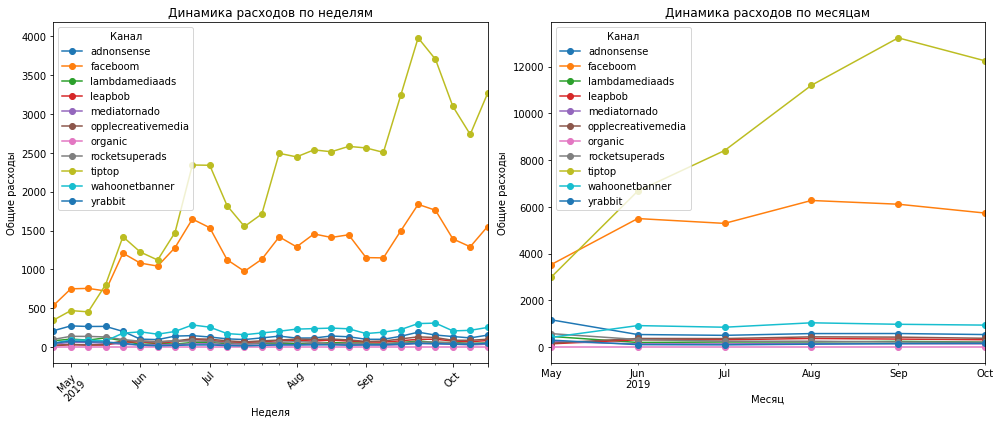

In [30]:
# Добавление колонок для неделя и месяц
profiles['week'] = profiles['dt'].dt.to_period('W').dt.start_time
profiles['month'] = profiles['dt'].dt.to_period('M').dt.start_time

# Группировка по неделям и каналам
weekly_expenses = profiles.groupby(['week', 'channel'])['acquisition_cost'].sum().unstack(fill_value=0)

# Группировка по месяцам и каналам
monthly_expenses = profiles.groupby(['month', 'channel'])['acquisition_cost'].sum().unstack(fill_value=0)

# Настройка графиков
plt.figure(figsize=(14, 6))

## График по неделям
plt.subplot(1, 2, 1)
weekly_expenses.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Общие расходы')
plt.xticks(rotation=45)
plt.legend(title='Канал')
plt.tight_layout()

## График по месяцам
plt.subplot(1, 2, 2)
monthly_expenses.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общие расходы')
plt.xticks(rotation=45)
plt.legend(title='Канал')
plt.tight_layout()

# Показать графики
plt.show()

**Вывод:** Затраты на маркетинг со временем возрастали только на каналах TipTop и FaceBoom.

## Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [31]:
# Считаем количество пользователей из каждого канала
user_counts = profiles['channel'].value_counts().reset_index()
user_counts.columns = ['channel', 'user_count']

# Суммируем расходы на привлечение пользователей по каналу
total_costs = profiles.groupby('channel')['acquisition_cost'].sum().reset_index()

# Объединяем данные о расходах и количестве пользователей
cac_df = pd.merge(total_costs, user_counts, on='channel')

# Рассчитываем CAC
cac_df['CAC'] = cac_df['acquisition_cost'] / cac_df['user_count']

# Выводим результаты
cac_df[['channel', 'CAC']].sort_values(by='CAC')

,channel,CAC
6,organic,0.000000
3,leapbob,0.210172
4,mediatornado,0.218717
10,yrabbit,0.218975
5,opplecreativemedia,0.250000
7,rocketsuperads,0.412095
9,wahoonetbanner,0.602245
2,lambdamediaads,0.724802
0,adnonsense,1.008054
1,faceboom,1.113286


**Вывод:** Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01).

**Рекомендации: Сократить расходы на трафик TipTop. Обратить внимание на каналы LeapBob, MediaTornado, YRabbit, OppleCreativeMedia. Привлечение пользователей с этих каналов обходится дешевле всего.**

# Шаг 5. Оцените окупаемость рекламы

## Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
## Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

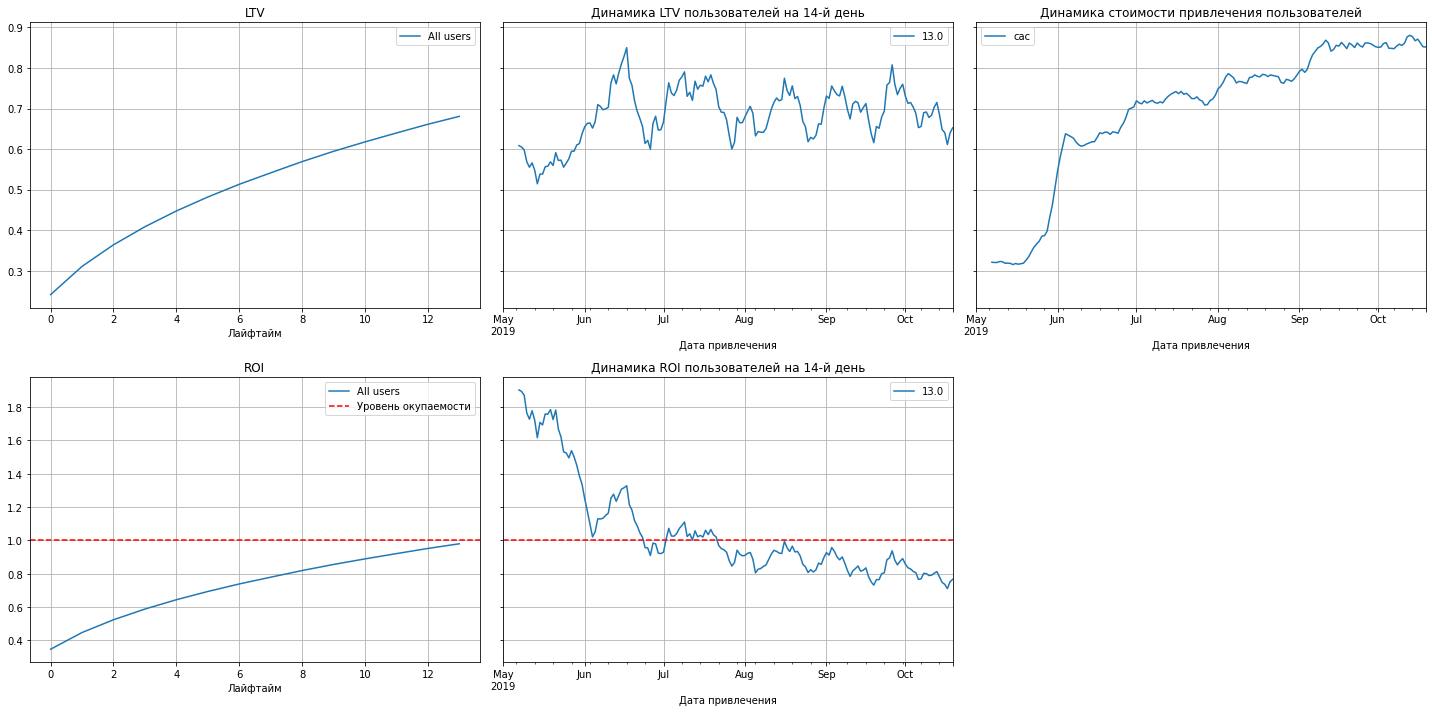

In [34]:
ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders_info,
    observation_date,
    horizon_days
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days
)

**Вывод:** LTV держится примерно на одном уровне на протяжении всего эксперимента, CAC растёт, а ROI не достигает уровня окупаемости. Пользователи перестают окупаться примерно в июне. Из полученных графиков видно, что LTV стабильно растёт. ROI находится ниже уровня окупаемости, а динамика ROI пользователей на 14-й день со временем падает.

## Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

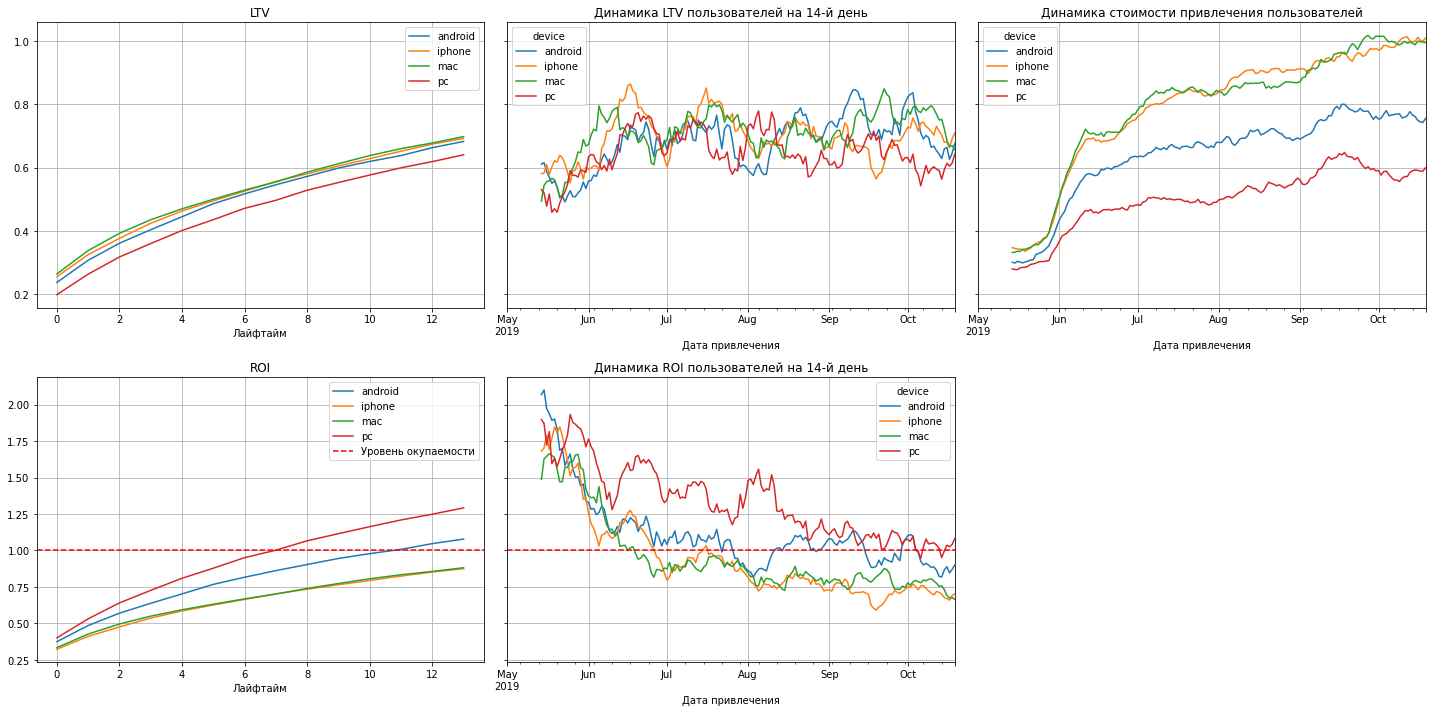

In [36]:
# вызовем функцию get_ltv()

ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=['device']
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days,
    window=14
)

**Вывод:** Показатель LTV и его динамика стабильны; Динамика стоимости привлечения пользователей растёт, как мы уже отмечали ранее, это движение затронуло пользователей всех устройств; ROI на графике показывает наличие прибыли на устройствах — ПК, метрика для девайсов iPhone и Mac, Android показывает отсутствие окупаемости. Снижение динамики ROI также наблюдается по всем устройствам.

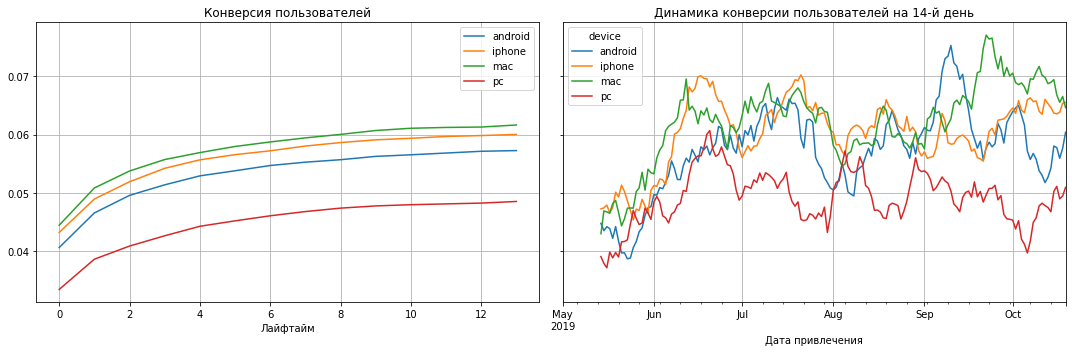

In [37]:
# вызовем функцию get_convertion()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=['device']
)

# вызовем функцию plot_conversion()

plot_conversion(conversion,
    conversion_history,
    horizon_days,
    window=14
)

**Вывод:** Конверсия пользователей в разбивке по устройствам стабильна. Динамика конверсии для пользователей iPhone и Mac выше, чем у других.

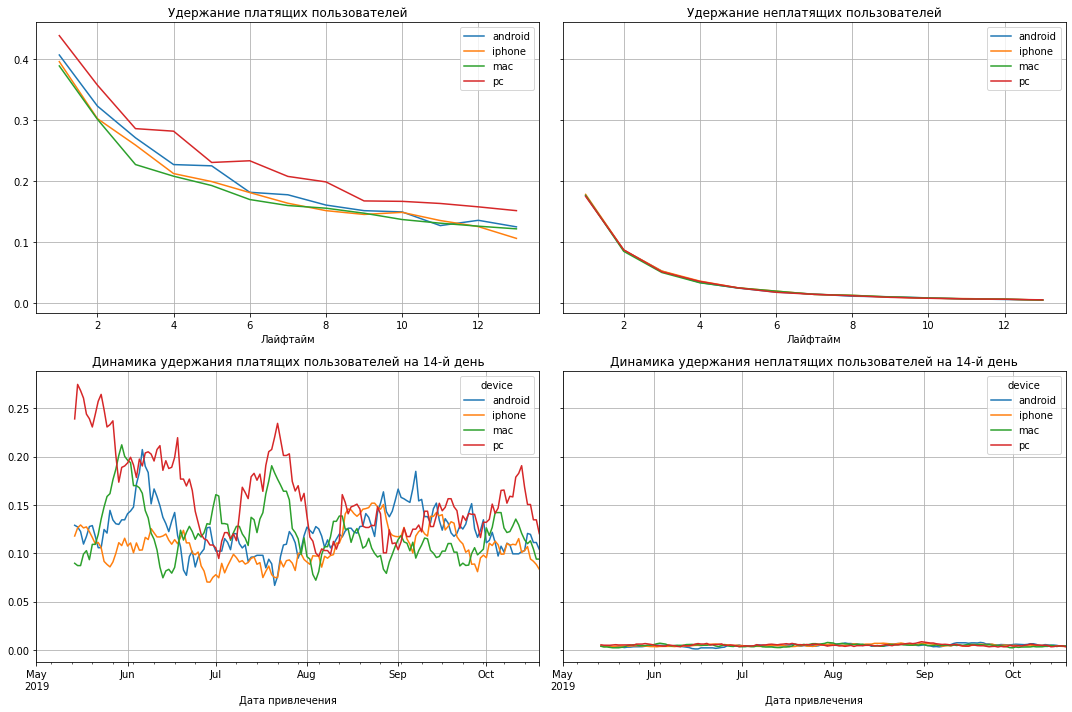

In [38]:
# вызовем функцию get_retention()

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits_info,
    observation_date,
    horizon_days,
    dimensions=['device']
)

# вызовем функцию plot_retention()

plot_retention(retention,
    retention_history,
    horizon_days,
    window=14
)

**Вывод:** Судя по графикам, можно сказать, что удержание платящих пользователей в основном направлено на клиентов с ПК, что может быть причиной того, что рекламная кампания для устройств Mac и iPhone не окупается. Возможно, стоит пересмотреть сценарий использования для этих устройств, потому что ПК не имеет такой большой доли платящих клиентов, как iPhone, Mac или Android. Хотя последний, в отличие от двух других, приносит прибыль приложению. Неплатящие пользователи в разбивке по устройствам демонстрируют стабильность в динамике удержания, а также в самой бизнес-метрике.

## Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

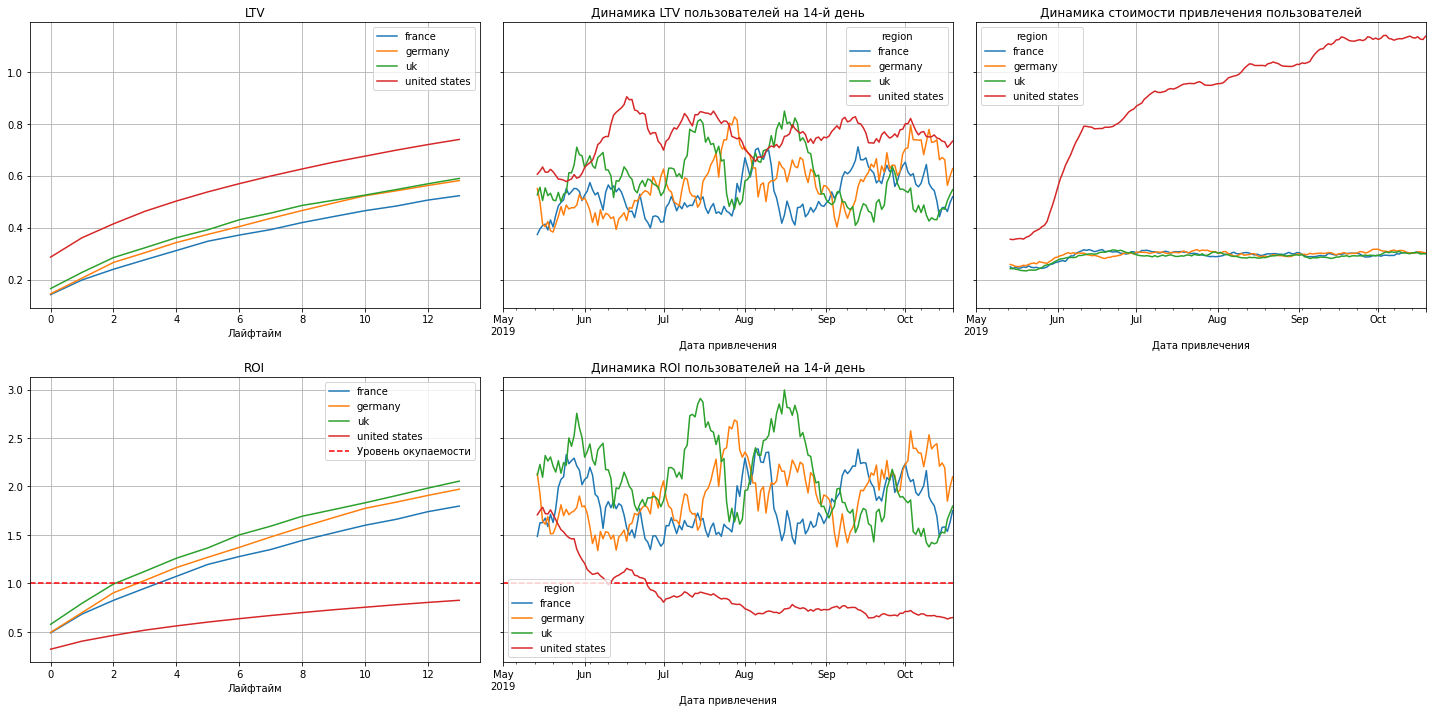

In [39]:
# вызовем функцию get_ltv()

ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days,
    window=14
)

**Вывод:** Привлечение пользователей из США не окупается, а динамика стоимости привлечения растет. Динамика ROI в этом регионе снижается на протяжении всего исследуемого периода. В остальных регионах все хорошо — LTV и его динамика, динамика стоимости привлечения, динамика ROI стабильны, а показатель ROI выше уровня окупаемости.

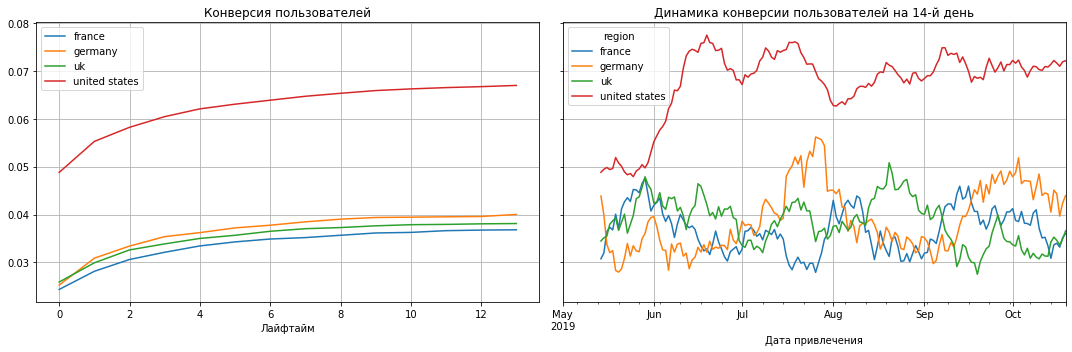

In [40]:
# вызовем функцию get_convertion()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# вызовем функцию plot_conversion()

plot_conversion(conversion,
    conversion_history,
    horizon_days,
    window=14
)

**Вывод:** США лидируют по высоким показателям конверсии и ее динамике. Значит, проблема точно не в этом. Проверим удержание пользователей.

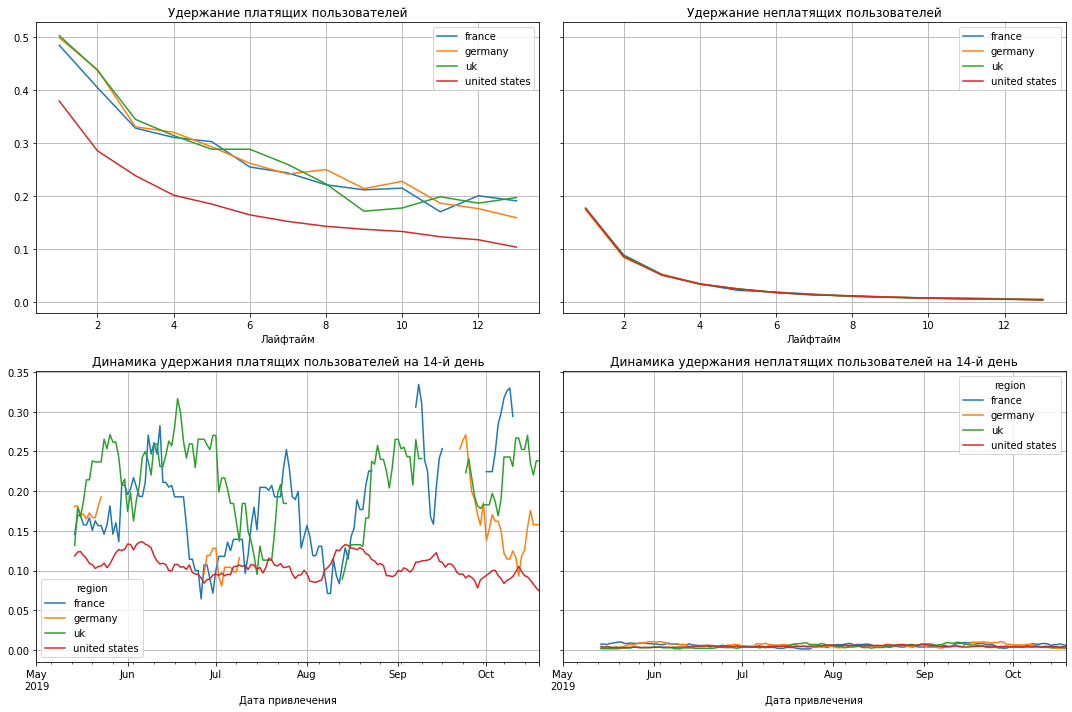

In [41]:
# вызовем функцию get_retention()

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits_info,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# вызовем функцию plot_retention()

plot_retention(retention,
    retention_history,
    horizon_days,
    window=14
)

**Вывод:** Удержание пользователей в проблемном регионе действительно очень низкое — ниже, чем на остальных территориях. Динамика удержания также выделяется своим низким уровнем по сравнению с остальными.

Низкое удержание при высокой стоимости привлечения является большой проблемой, особенно когда твоя основная аудитория находится в регионе с такими показателями.

**Окупаемость рекламы с разбивкой по рекламным каналам.**

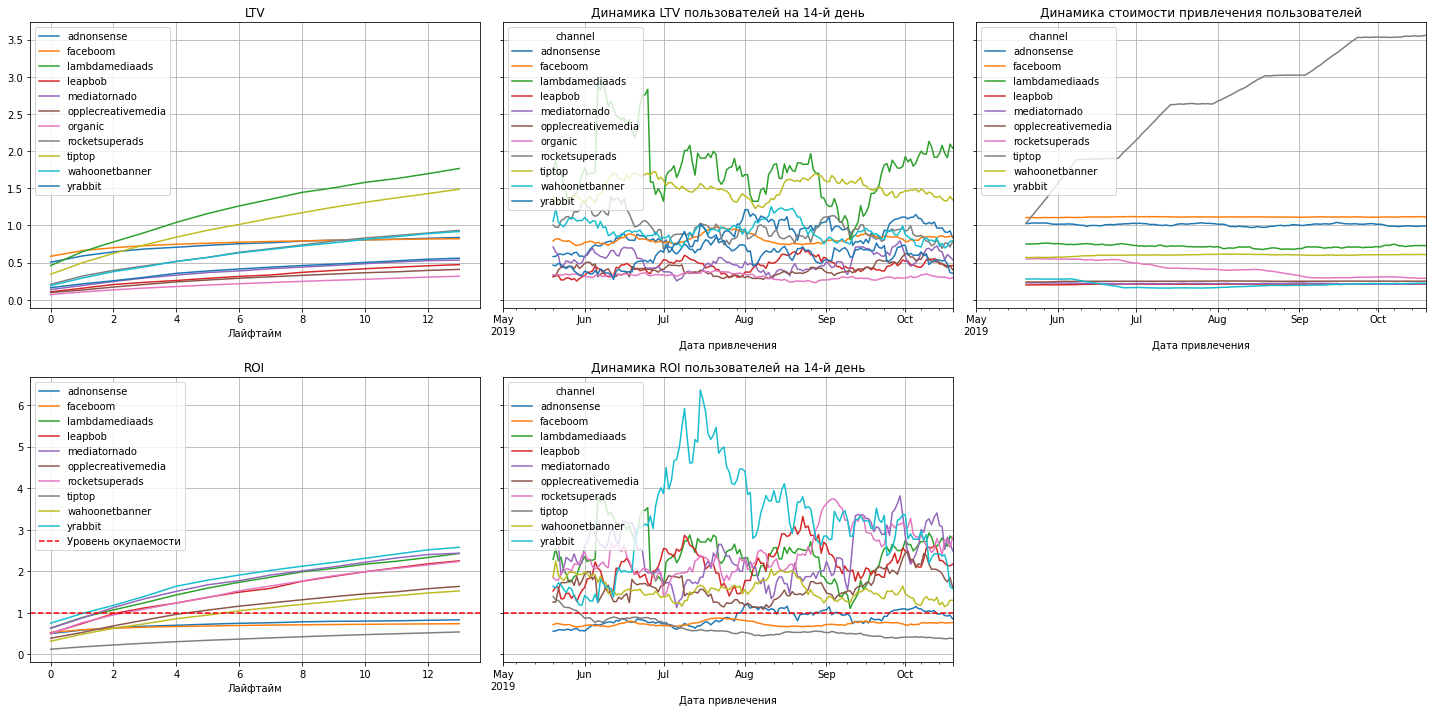

In [42]:
# вызовем функцию get_ltv()

ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days,
    window=20
)

**Вывод:** LTV имеет форму, приближенную к эталонной, самый низкий показатель у органического канала, а самый высокий — у lambdaMediaAds; Динамика LTV практически стабильна, за исключением колебаний канала lambdaMediaAds; Динамика стоимости привлечения пользователей имеет тенденцию к росту по каналу привлечения TipTop, как мы и видели ранее; Каналы, не окупающие себя: FaceBoom, TipTop, AdNonSense. По графику динамики ROI каналы FaceBoom, TipTop, AdNonSense не окупаются.

## Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

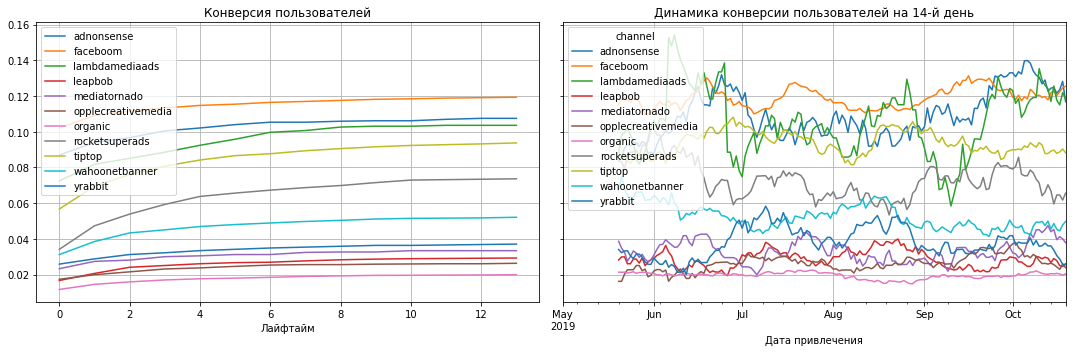

In [43]:
# вызовем функцию get_convertion()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders_info,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# вызовем функцию plot_conversion()

plot_conversion(conversion,
    conversion_history,
    horizon_days,
    window=20
)

**Вывод:** канал FaceBoom обладает самой высокой конверсией. Ранее мы выяснили, что доля платящих пользователей, привлеченных этим каналом, составляет около 40% от всех пользователей приложения. Самая низкая конверсия у пользователей, пришедших естественным путем.

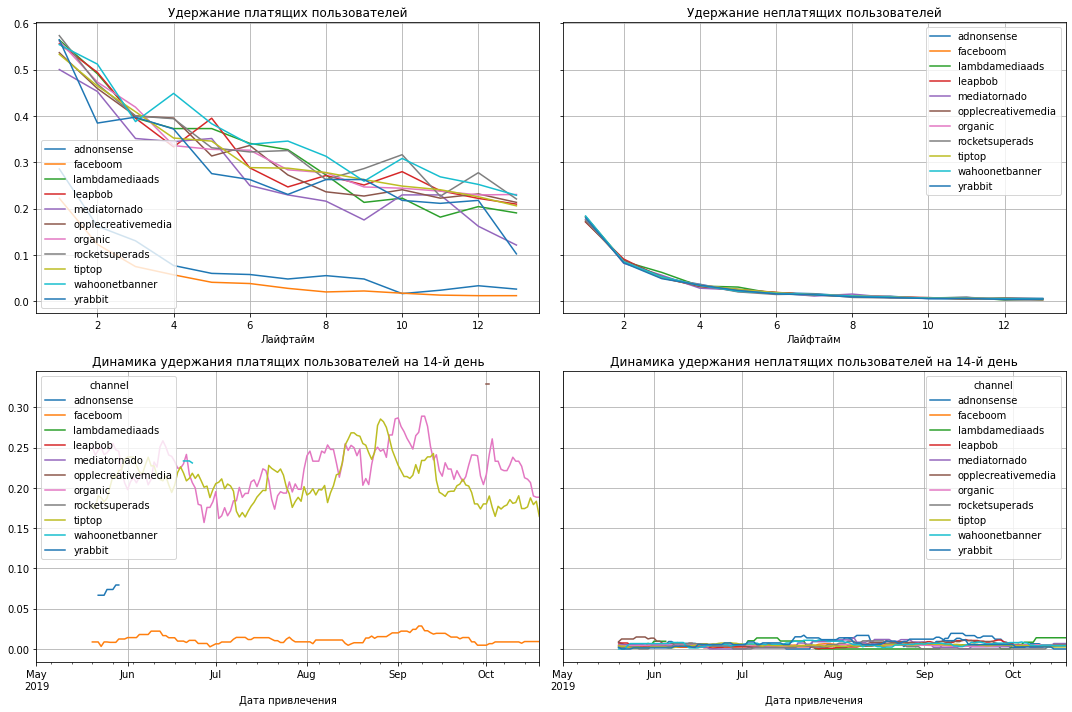

In [44]:
# вызовем функцию get_retention()

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits_info,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# вызовем функцию plot_retention()

plot_retention(retention,
    retention_history,
    horizon_days,
    window=20
)

**Вывод:** Удержание платящих пользователей по каналу TipTop среднее, не самое низкое и не самое высокое. Динамика удержания по каналу FaceBoom показывает показатель, близкий к нулю, этот же показатель у канала TipTop находится в весьма адекватном положении. Канал FaceBoom с хорошей конверсией, но с плохим удержанием платящих пользователей, принес нашему приложению большее количество этих самых пользователей за исследуемый период. Также плохим удержанием обладает канал AdNonSense. Если смотреть на данные в целом, то реклама не окупается.

## Ответьте на такие вопросы:
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?

Реклама не окупается к концу второй недели

Устройства Mac и Iphone, страна США, каналы TipTop, FaceBoom, AdNonSense

Неправильно распределяют средства

# Шаг 6. Напишите выводы

По визитам: в наборе данных содержится 309901 запись. Отсутствие пропусков: Все столбцы содержат полные данные (non-null count равен количеству записей), что упрощает анализ и исключает необходимость в предварительной обработке данных для заполнения пропусков. Session реобразовать в формат datetime

По заказам: В DataFrame содержится 40212 записей. Пропуски отсутствуют. Поскольку столбец Event Dt имеет тип object, его следует преобразовать в формат datetime. Это позволит более эффективно анализировать данные по времени (например, группировать по месяцам, неделям или дням).

По расходам: В DataFrame содержится 1800 записей. Этот столбец имеет 1800 непустых значений, но его тип данных определяется как object. Это указывает на то, что данные могут быть представлены в виде строк, и их следует преобразовать в формат datetime для более удобного анализа временных характеристик (например, для анализа расходов по времени). Пропуски отсутствуют. Проверили наличие пропусков и дубликатов, изменитил тип данных. 

Задали функции для исследования. Наибольшая доля пользователей, которые платят и заходят в приложении находятся в США.Наибольшая доля пользователей, которые платят и заходят в приложении пользуются iphone и mac. Наибольшая доля пользователей, которые платят и заходят в приложении приходят из каналов faceboom и adnonsense. Общая сумма расходов на маркетинг: 105497.30000000002 Общая сумма расходов на маркетинг 105497. Больше всего было потрачено на маркетинг в TipTop и FaceBoom. Затраты на маркетинг со временем возрастали только на каналах TipTop и FaceBoom.Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01).

Рекомендации: Сократить расходы на трафик TipTop. Обратить внимание на каналы LeapBob, MediaTornado, YRabbit, OppleCreativeMedia. Привлечение пользователей с этих каналов обходится дешевле всего. 

LTV держится примерно на одном уровне на протяжении всего эксперимента, CAC растёт, а ROI не достигает уровня окупаемости. Пользователи перестают окупаться примерно в июне. Из полученных графиков видно, что LTV стабильно растёт. ROI находится ниже уровня окупаемости, а динамика ROI пользователей на 14-й день со временем падает. Показатель LTV и его динамика стабильны; 

Динамика стоимости привлечения пользователей растёт, как мы уже отмечали ранее, это движение затронуло пользователей всех устройств; ROI на графике показывает наличие прибыли на устройствах — ПК, метрика для девайсов iPhone и Mac, Android показывает отсутствие окупаемости. 

Снижение динамики ROI также наблюдается по всем устройствам. Конверсия пользователей в разбивке по устройствам стабильна. Динамика конверсии для пользователей iPhone и Mac выше, чем у других.Судя по графикам, можно сказать, что удержание платящих пользователей в основном направлено на клиентов с ПК, что может быть причиной того, что рекламная кампания для устройств Mac и iPhone не окупается. Возможно, стоит пересмотреть сценарий использования для этих устройств, потому что ПК не имеет такой большой доли платящих клиентов, как iPhone, Mac или Android. Хотя последний, в отличие от двух других, приносит прибыль приложению. Неплатящие пользователи в разбивке по устройствам демонстрируют стабильность в динамике удержания, а также в самой бизнес-метрике.

Привлечение пользователей из США не окупается, а динамика стоимости привлечения растет. Динамика ROI в этом регионе снижается на протяжении всего исследуемого периода. В остальных регионах все хорошо — LTV и его динамика, динамика стоимости привлечения, динамика ROI стабильны, а показатель ROI выше уровня окупаемости.США лидируют по высоким показателям конверсии и ее динамике. Значит, проблема точно не в этом. Проверим удержание пользователей.

Удержание пользователей в проблемном регионе действительно очень низкое — ниже, чем на остальных территориях. Динамика удержания также выделяется своим низким уровнем по сравнению с остальными.

Низкое удержание при высокой стоимости привлечения является большой проблемой, особенно когда твоя основная аудитория находится в регионе с такими показателями.LTV имеет форму, приближенную к эталонной, самый низкий показатель у органического канала, а самый высокий — у lambdaMediaAds; Динамика LTV практически стабильна, за исключением колебаний канала lambdaMediaAds; 

Динамика стоимости привлечения пользователей имеет тенденцию к росту по каналу привлечения TipTop, как мы и видели ранее; Каналы, не окупающие себя: FaceBoom, TipTop, AdNonSense. 

По графику динамики ROI каналы FaceBoom, TipTop, AdNonSense не окупаются.канал FaceBoom обладает самой высокой конверсией. Ранее мы выяснили, что доля платящих пользователей, привлеченных этим каналом, составляет около 40% от всех пользователей приложения. Самая низкая конверсия у пользователей, пришедших естественным путем.Удержание платящих пользователей по каналу TipTop среднее, не самое низкое и не самое высокое. 

Динамика удержания по каналу FaceBoom показывает показатель, близкий к нулю, этот же показатель у канала TipTop находится в весьма адекватном положении. Канал FaceBoom с хорошей конверсией, но с плохим удержанием платящих пользователей, принес нашему приложению большее количество этих самых пользователей за исследуемый период. Также плохим удержанием обладает канал AdNonSense.

Если смотреть на данные в целом, то реклама не окупается.Реклама не окупается к концу второй недели